In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Linear regression with 1 independent variable 

In [3]:
data = pd.read_excel('../../datasets/cricket_chirps.xlsx')

In [4]:
data.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


X = chirps/sec for the striped ground cricket <br>
Y = temperature in degrees Fahrenheit

In [5]:
data.shape

(15, 2)

<AxesSubplot:>

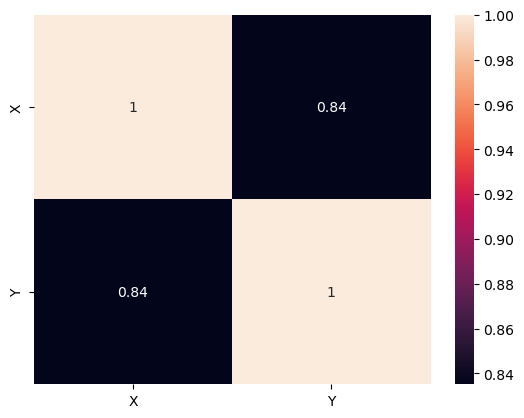

In [6]:
sns.heatmap(data=data.corr(), annot= True)

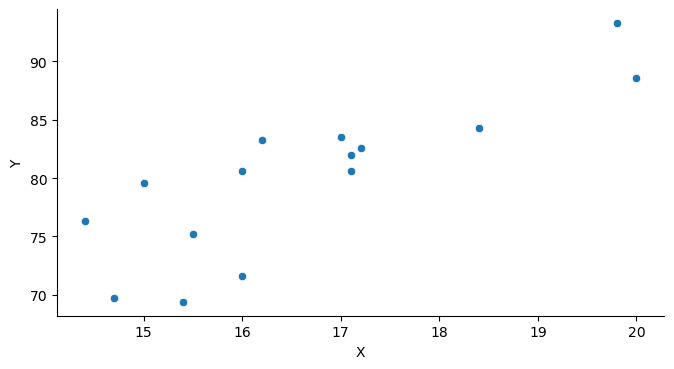

In [7]:
sns.relplot(x='X', y='Y', data=data,
            height=3.8, aspect=1.8, kind='scatter')

In [8]:
y = data.iloc[:,1]
X = data.iloc[:, :-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(5, 1)
(10,)
(5,)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_

array([2.96769745])

<AxesSubplot:xlabel='X', ylabel='Y'>

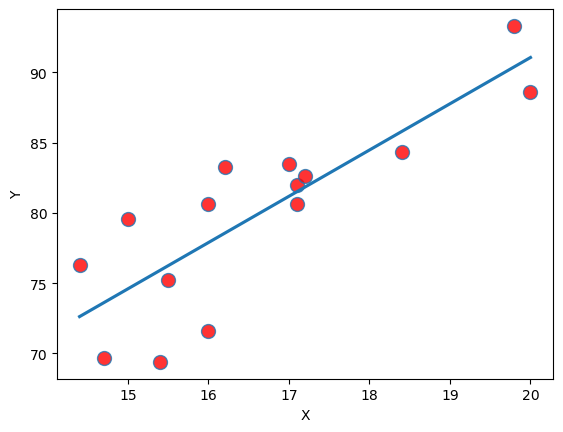

In [13]:
sns.regplot(x='X', y='Y', data=data, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [14]:
y_pred = model.predict(X_test)
y_pred

array([84.86797733, 81.0099729 , 73.88749733, 89.02275263, 74.77780713])

### Comparison of predicted results with the actual ones

In [15]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
3,84.300003,84.867977
7,82.000000,81.009973
6,69.699997,73.887497
2,93.300003,89.022753
10,79.599998,74.777807


### Mean absolute error

In [16]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 2.9689887041411396


### Mean square error

In [17]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 12.077261674026328


### R2 score

In [18]:
r2= r2_score(y_test, y_pred)
r2

0.7916191361329021

# Linear regression with more than 1 independent variables

In [95]:
ads = pd.read_csv('../../datasets/advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

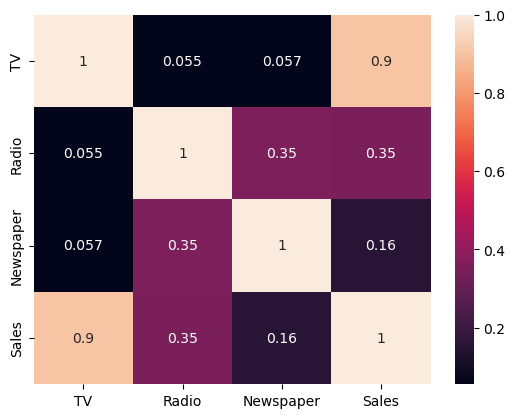

In [96]:
sns.heatmap(data=ads.corr(), annot= True)

In [97]:
X = ads.iloc[:, :-1]
y = ads.iloc[:, -1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

### Comparison of predicted sales with the actual ones

In [87]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head(10)

,Actual,Predicted
18,11.3,10.689093
170,8.4,8.673711
107,12.0,9.599699
98,25.4,24.999898
177,16.7,14.735906
182,8.7,8.376049
5,7.2,10.703504
146,18.2,18.376707
12,9.2,9.967003
152,16.6,17.879468


### R2 score

In [101]:
r2_score(y_test, y_pred)

0.869205273491013

### R2 score after sorting through combinations of features

TV & Radio: 0.8695929214202679; <br>
TV & Newspapers: 0.827456128297248; <br>
Radio & Newspapers: -0.02156400492816135 <br>

# Polynomial regression

In [6]:
data = pd.read_csv('../../datasets/Position_Salaries.csv')
del data['Position']
data.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


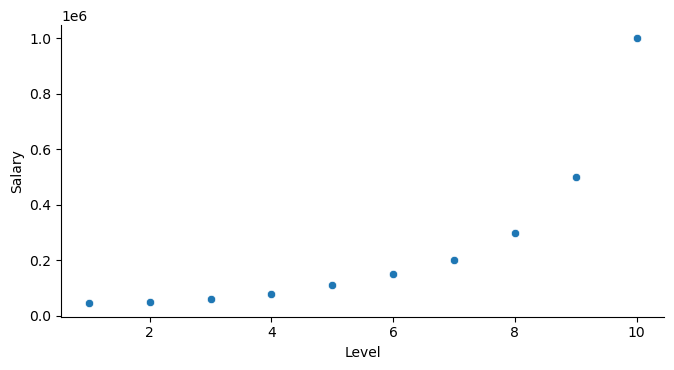

In [4]:
sns.relplot(x='Level', y='Salary', data=data,
            height=3.8, aspect=1.8, kind='scatter')

In [20]:
y = data.iloc[:,1]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=0)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

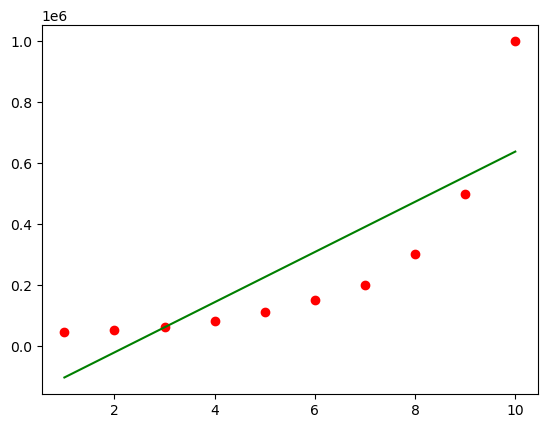

In [19]:
plt.scatter(X, y, c="r")
plt.plot(X,model.predict(X), c="g")
plt.show()

### The search of best params for polynomial regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
param_grid = [
    {'poly__degree': np.linspace(2, 7, 7, dtype = int)}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
poly_grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid.fit(X_train, y_train)
poly_grid.best_params_

{'poly__degree': 6}

In [43]:
model_poly= PolynomialFeatures(degree= 6)  
x_poly= model_poly.fit_transform(X)  

model_lin2 =LinearRegression()  
model_lin2.fit(x_poly, y) 

LinearRegression()

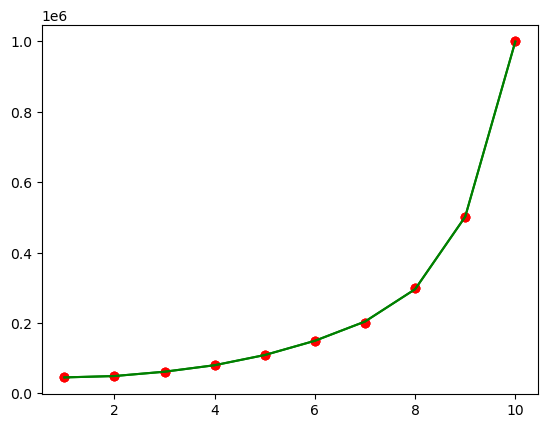

In [46]:
plt.scatter(X, y, c="r")
plt.plot(X,model_lin2.predict(model_poly.fit_transform(X)), c="g")
plt.show()